In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

1 次：
accuracy：	0.99
precision：	0.0
recall：	0.0
F1-score：	0.0

2 次：
accuracy：	0.94
precision：	0.142857142857
recall：	1.0
F1-score：	0.25

3 次：
accuracy：	0.994
precision：	0.625
recall：	1.0
F1-score：	0.769230769231

4 次：
accuracy：	0.994
precision：	0.625
recall：	1.0
F1-score：	0.769230769231



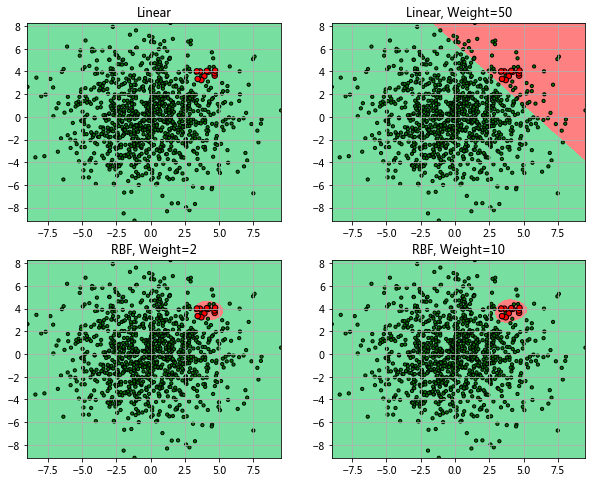

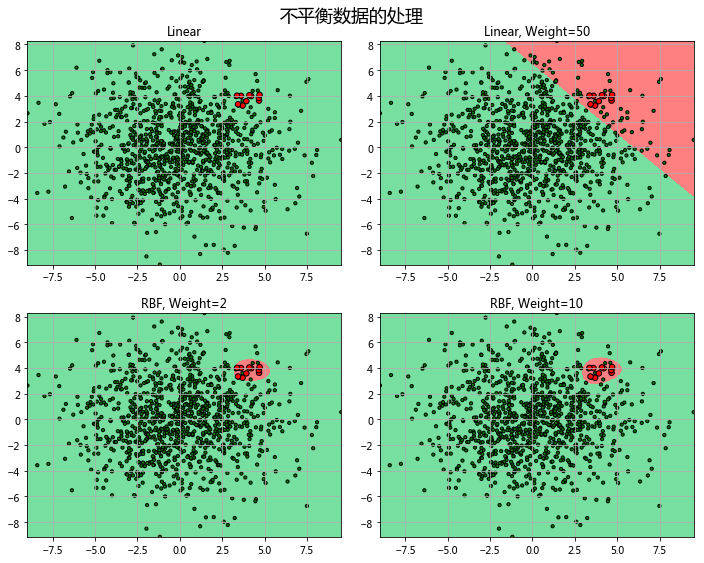

In [3]:
if __name__ == "__main__":
    warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
    np.random.seed(0)   # 保持每次生成的数据相同

    c1 = 990
    c2 = 10
    N = c1 + c2
    x_c1 = 3*np.random.randn(c1, 2)
    x_c2 = 0.5*np.random.randn(c2, 2) + (4, 4)
    x = np.vstack((x_c1, x_c2))
    y = np.ones(N)
    y[:c1] = -1

    # 显示大小
    s = np.ones(N) * 30
    s[:c1] = 10

    # 分类器
    clfs = [svm.SVC(C=1, kernel='linear'),
           svm.SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 50}),
           svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
           svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]
    titles = 'Linear', 'Linear, Weight=50', 'RBF, Weight=2', 'RBF, Weight=10'

    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
    cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
    # matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    # matplotlib.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10, 8), facecolor='w')
    for i, clf in enumerate(clfs):
        clf.fit(x, y)

        y_hat = clf.predict(x)
        # show_accuracy(y_hat, y) # 正确率
        # show_recall(y, y_hat)   # 召回率
        print i+1, '次：'
        print 'accuracy：\t', accuracy_score(y, y_hat)
        print 'precision：\t', precision_score(y, y_hat, pos_label=1)
        print 'recall：\t', recall_score(y, y_hat, pos_label=1)
        print 'F1-score：\t', f1_score(y, y_hat, pos_label=1)
        print


        # 画图
        plt.subplot(2, 2, i+1)
        grid_hat = clf.predict(grid_test)       # 预测分类值
        grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
        plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
        plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=s, cmap=cm_dark)      # 样本的显示
        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.title(titles[i])
        plt.grid()
    plt.suptitle(u'不平衡数据的处理', fontsize=18)
    plt.tight_layout(1.5)
    plt.subplots_adjust(top=0.92)
    plt.show()